In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


In [110]:
epochs = 100
lr = 1e-3
batch_size =64
img_dims = (96,96,3)

data = []
labels = []

# load image files from the dataset
image_files = [f for f in glob.glob(r'C:\Users\Sagar\kaggle Upload' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [111]:
# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2]
    if label == "drowsy":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing
data = np.array(data) / 255
labels = np.array(labels)

In [112]:
# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [113]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [114]:
# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

Epoch 1/100
66/66 [==============================] - 69s 1s/step - loss: 0.8658 - accuracy: 0.6352 - val_loss: 0.9250 - val_accuracy: 0.4981
Epoch 2/100
66/66 [==============================] - 68s 1s/step - loss: 0.6387 - accuracy: 0.7014 - val_loss: 1.2453 - val_accuracy: 0.4878
Epoch 3/100
66/66 [==============================] - 70s 1s/step - loss: 0.5757 - accuracy: 0.7375 - val_loss: 0.7593 - val_accuracy: 0.5254
Epoch 4/100
66/66 [==============================] - 68s 1s/step - loss: 0.5158 - accuracy: 0.7715 - val_loss: 0.9134 - val_accuracy: 0.5744
Epoch 5/100
66/66 [==============================] - 71s 1s/step - loss: 0.4672 - accuracy: 0.7753 - val_loss: 3.0920 - val_accuracy: 0.4962
Epoch 6/100
66/66 [==============================] - 68s 1s/step - loss: 0.4492 - accuracy: 0.7901 - val_loss: 0.8481 - val_accuracy: 0.6497
Epoch 7/100
66/66 [==============================] - 68s 1s/step - loss: 0.4287 - accuracy: 0.7994 - val_loss: 1.5170 - val_accuracy: 0.6017
Epoch 8/100
6

Epoch 59/100
66/66 [==============================] - 74s 1s/step - loss: 0.0820 - accuracy: 0.9692 - val_loss: 0.5979 - val_accuracy: 0.8851
Epoch 60/100
66/66 [==============================] - 73s 1s/step - loss: 0.0835 - accuracy: 0.9739 - val_loss: 0.8376 - val_accuracy: 0.8569
Epoch 61/100
66/66 [==============================] - 74s 1s/step - loss: 0.0834 - accuracy: 0.9696 - val_loss: 2.3382 - val_accuracy: 0.8041
Epoch 62/100
66/66 [==============================] - 73s 1s/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0.8477 - val_accuracy: 0.8785
Epoch 63/100
66/66 [==============================] - 73s 1s/step - loss: 0.0715 - accuracy: 0.9730 - val_loss: 0.1404 - val_accuracy: 0.9529
Epoch 64/100
66/66 [==============================] - 73s 1s/step - loss: 0.0785 - accuracy: 0.9718 - val_loss: 0.8495 - val_accuracy: 0.8305
Epoch 65/100
66/66 [==============================] - 73s 1s/step - loss: 0.0728 - accuracy: 0.9737 - val_loss: 0.1730 - val_accuracy: 0.9492
Epoch 

INFO:tensorflow:Assets written to: drow_2.model\assets


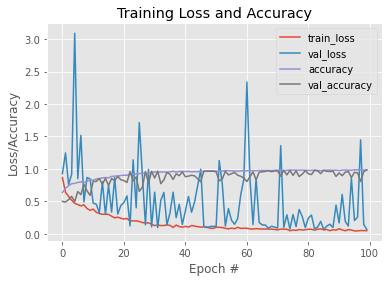

In [117]:
# save the model to disk
model.save('drow_2.model')
model.save('drow_22.h5')
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = 100
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')

In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
import playsound as play
path="C:\\Users\\Sagar\\Desktop\\DAI\\Final_run"        
# load model
model = load_model('drow_2.model')

# open webcam
webcam = cv2.VideoCapture(0)
    
classes = ['drowsy','alert']

score=0
count=0
while webcam.isOpened():
    status, frame = webcam.read()


    face, confidence = cv.detect_face(frame)



    for idx, f in enumerate(face):

           
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]


        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)


        face_crop = np.copy(frame[startY:endY,startX:endX])

        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue


        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)


        conf = model.predict(face_crop)[0] 

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

        Y = startY - 10 if startY - 10 > 10 else startY + 10

        if classes[idx]=='drowsy':
            score=score+1
            cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)
        else:
            score=score-1
            cv2.putText(frame, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,0.7, (0, 255, 0), 2)
            
        if score<0:
            score=0

        
        if score>100:

            cv2.imwrite(os.path.join(path,'image'+str(count)+'.jpg'),frame)
            count=count+1
            try:
                play.playsound('C:\\Users\\Sagar\\PycharmProjects\\DAI\\alarm.wav')
                
            except: 
                pass
        
    
            
            
    # display output
    cv2.imshow("Drowsiness", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()

In [121]:
prediction = model.predict_classes(testX)

labels_new=['drowsy','alert']
from sklearn.metrics import classification_report
print(classification_report(np.argmax(testY, axis=1), prediction, target_names=labels_new))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

      drowsy       0.98      0.99      0.98       529
       alert       0.99      0.98      0.98       533

    accuracy                           0.98      1062
   macro avg       0.98      0.98      0.98      1062
weighted avg       0.98      0.98      0.98      1062



In [122]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_82 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_83 (Activation)   (None, 32, 32, 64)      

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv

In [17]:
labels_new = ['drowsy','alert']
IMG_SIZE = 96
def prepare(filepath, face_cas="haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = load_model('drow_2.model')

In [18]:
prediction = model.predict([prepare("C:\\Users\\Sagar\\kaggle Upload\\alert\\54.jpg")])
np.argmax(prediction)


1

In [19]:
prediction = model.predict([prepare("C:\\Users\\Sagar\\kaggle Upload\\drowsy\\565.jpg")])
np.argmax(prediction)

0